In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Wczytanie danych
file_path = 'default_of_credit_card_clients.xls'
data = pd.read_excel(file_path, header=[1])

In [3]:
# Sprawdzenie brakujących danych
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


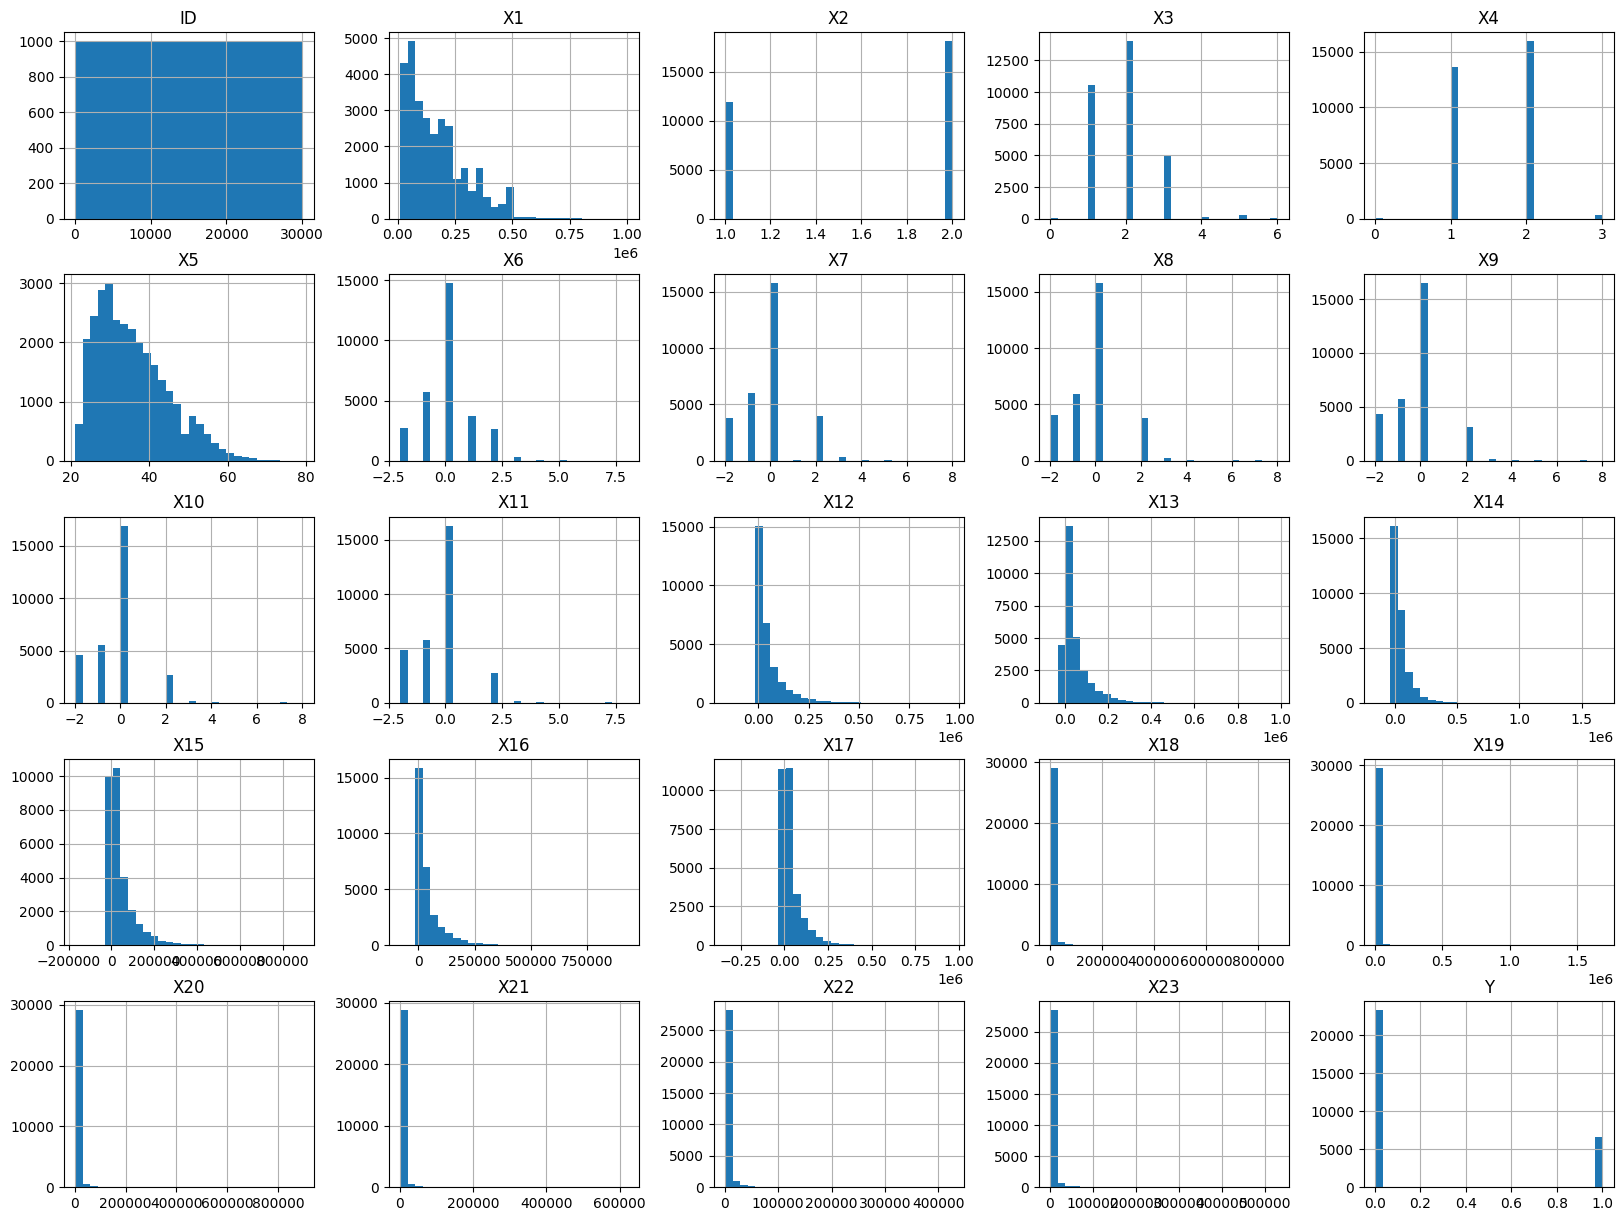

In [4]:
# Histogramy dla zmiennych numerycznych
data.hist(bins=30, figsize=(20, 15))
plt.show()

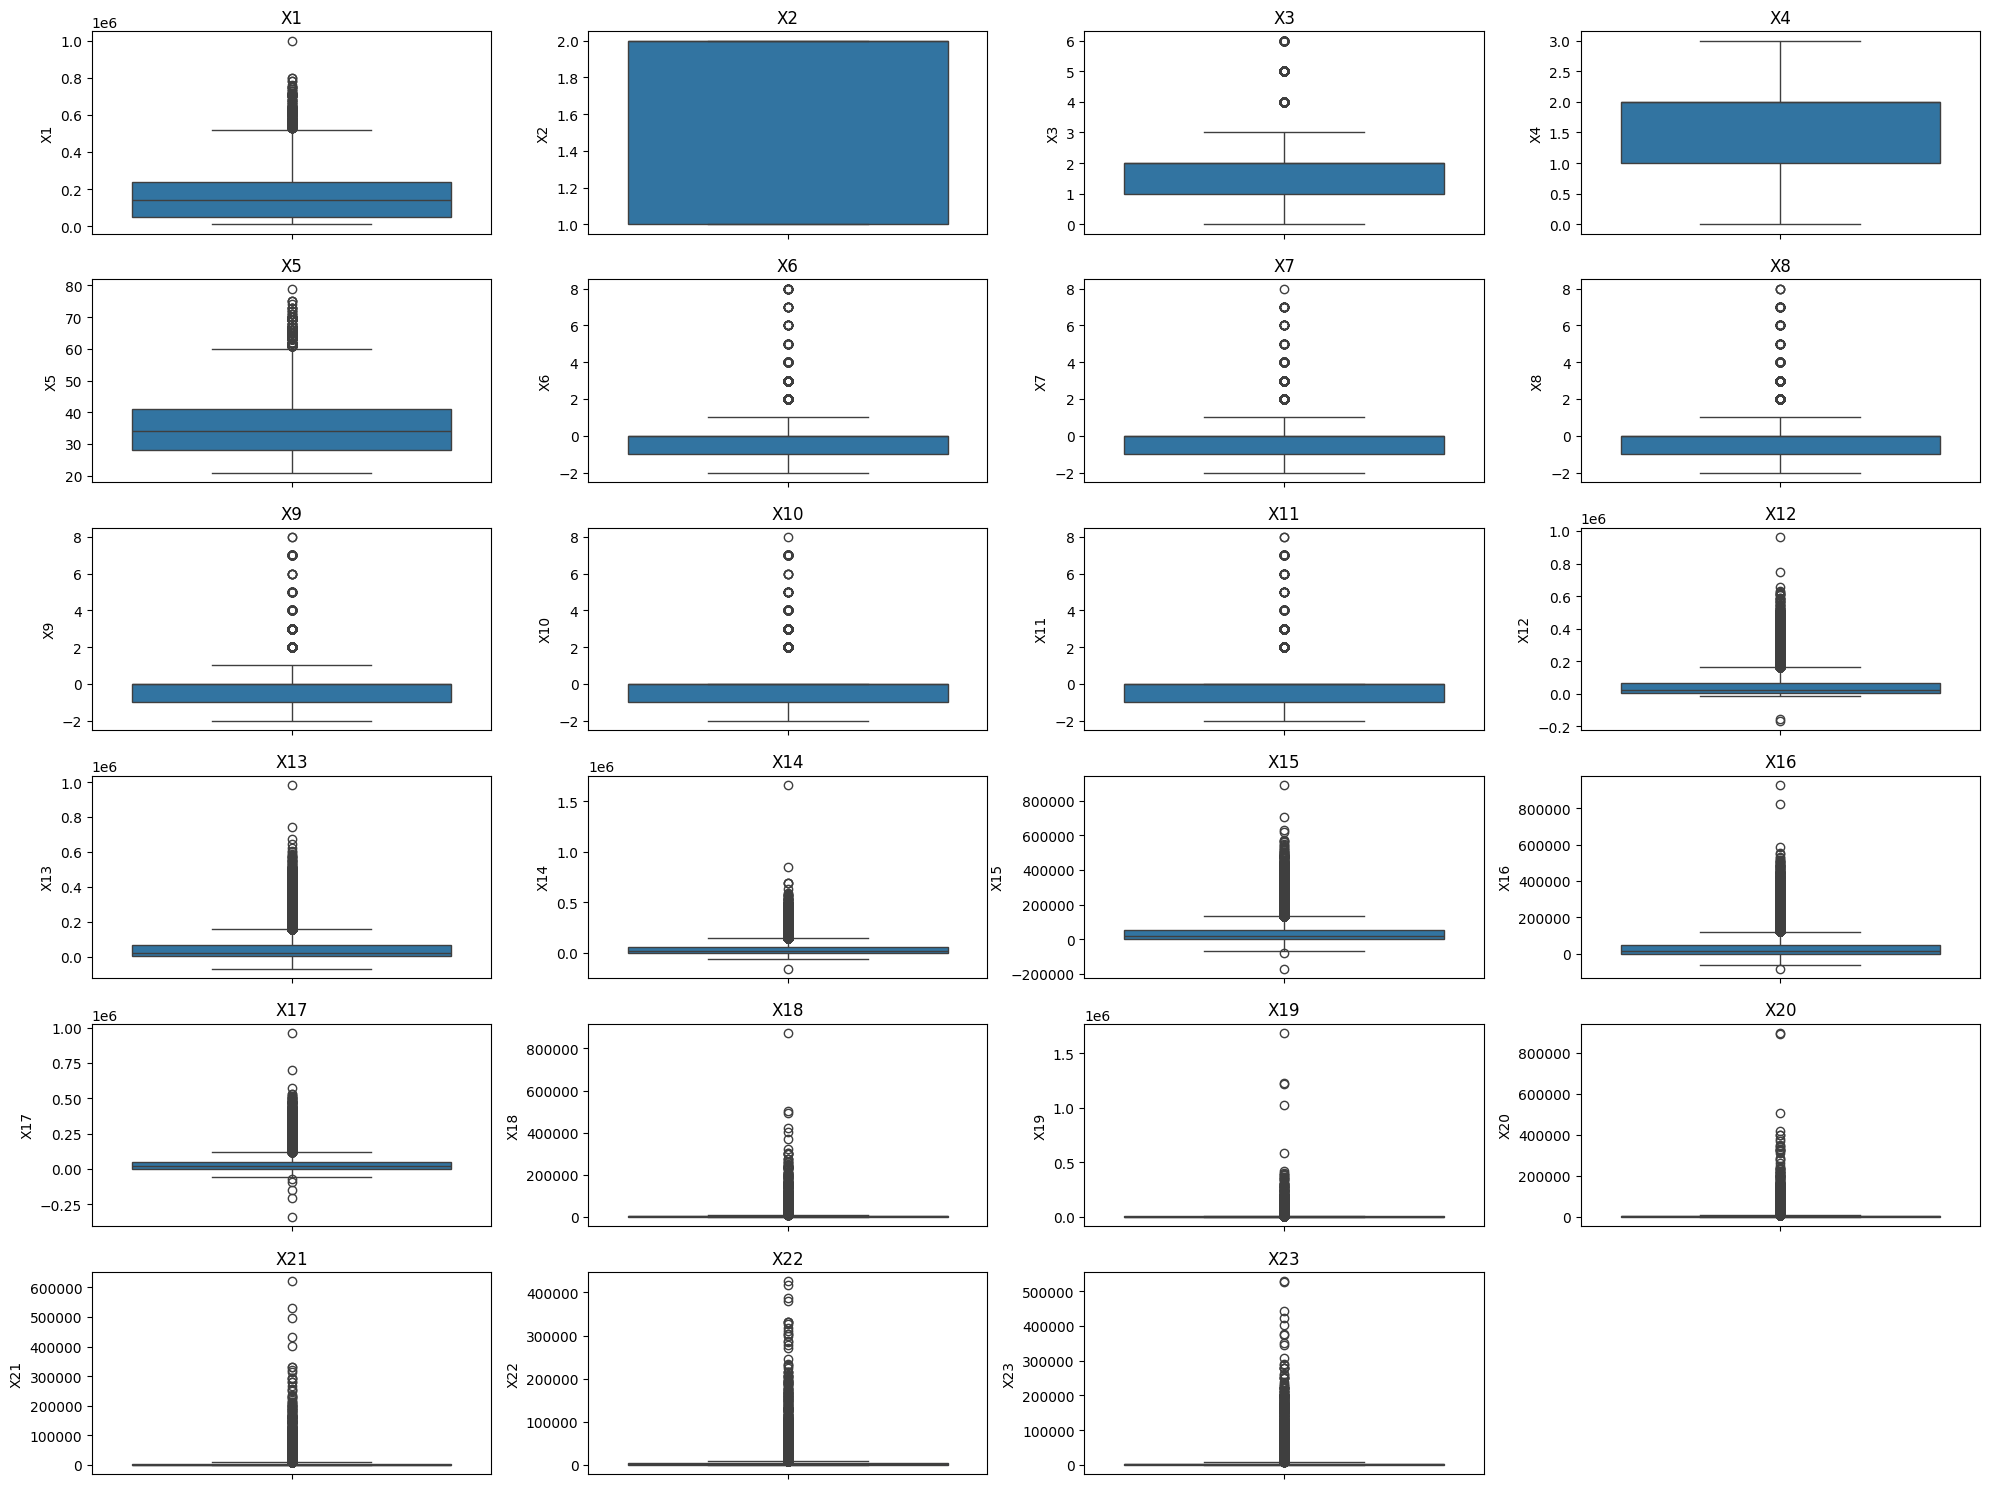

In [5]:

# Wykresy pudełkowe dla zmiennych numerycznych
numeric_features = data.columns[1:-1]  # Pomijamy kolumnę ID oraz zmienną docelową
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(6, 4, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
# przygotowanie danych
numeric_features = ['X1', 'X2', 'X3', 'X4', 'X5'] + [f'X{num}' for num in range(6, 24)]

In [7]:
# Pipeline dla zmiennych numerycznych
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [8]:
# ColumnTransformer do przetwarzania kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [9]:
# Podział danych na zmienne X i y
X = data.drop(columns=['ID', 'Y'])
y = data['Y']

In [10]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Pipeline z modelem drzewa decyzyjnego
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

# Siatka hiperparametrów
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV dla drzewa decyzyjnego
dt_grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Prognoza na zbiorze testowym
y_pred_dt = dt_grid_search.predict(X_test)

# Ocena modelu
print("Drzewo Decyzyjne - Wyniki:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Drzewo Decyzyjne - Wyniki:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

Confusion Matrix:
[[6669  340]
 [1312  679]]


In [12]:
# Pipeline z modelem Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Siatka hiperparametrów
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV dla Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Prognoza na zbiorze testowym
y_pred_rf = rf_grid_search.predict(X_test)

# Ocena modelu
print("Random Forest - Wyniki:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Wyniki:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

Confusion Matrix:
[[6660  349]
 [1295  696]]
